In [1]:
# Initial Data Exploration
import pandas as pd

data_AAPL=pd.read_csv('AAPL, 1D 01012007-12072023.csv',sep=',')
data_AAPL.head()
data_AAPL.shape
data_AAPL.describe()
data_AAPL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        4159 non-null   float64
 1   vwap          4159 non-null   float64
 2   open          4159 non-null   float64
 3   close         4159 non-null   float64
 4   high          4159 non-null   float64
 5   low           4159 non-null   float64
 6   time          4159 non-null   int64  
 7   transactions  4159 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 260.1 KB


It's a dataset containing 4159 data on volume,vwap,open,close,high price, low price, time and transactions. All variables are numeric variables.

In [2]:
# Check for missing values
print("\nMissing values count:\n", data_AAPL.isna().sum())


Missing values count:
 volume          0
vwap            0
open            0
close           0
high            0
low             0
time            0
transactions    0
dtype: int64


As we can see, there isn't missing values.

In [3]:
# Create a datetime variable for better data analysis

import pandas as pd
data_AAPL['datetime'] = pd.to_datetime(data_AAPL['time'], unit='s')
data_AAPL.info()
data_AAPL.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   volume        4159 non-null   float64       
 1   vwap          4159 non-null   float64       
 2   open          4159 non-null   float64       
 3   close         4159 non-null   float64       
 4   high          4159 non-null   float64       
 5   low           4159 non-null   float64       
 6   time          4159 non-null   int64         
 7   transactions  4159 non-null   int64         
 8   datetime      4159 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 292.6 KB


,volume,vwap,open,close,high,low,time,transactions,datetime
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737,2007-01-03 05:00:00
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333,2007-01-04 05:00:00
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050,2007-01-05 05:00:00
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547,2007-01-08 05:00:00
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578,2007-01-09 05:00:00


In [4]:
# verification of the frequency of financial transactions
data_AAPL.set_index('datetime', inplace=True)


# Define 'datetime' as index

# Data frequency check
print(data_AAPL.index.to_series().diff().value_counts())

datetime
1 days 00:00:00    3258
3 days 00:00:00     716
4 days 00:00:00     112
2 days 00:00:00      38
2 days 23:00:00      17
3 days 01:00:00      16
5 days 00:00:00       1
Name: count, dtype: int64


We put the variable 'datetime' in index and we calculate the frequency of this variable.Most of the Data is daily.

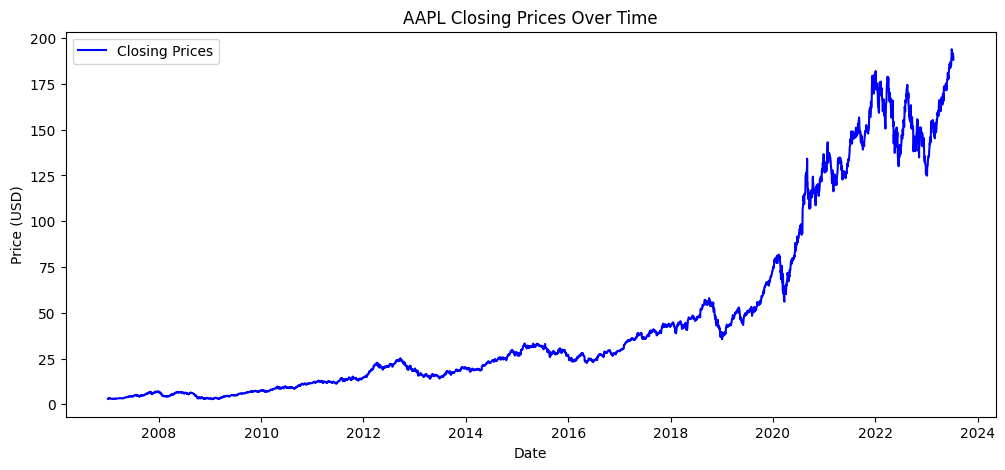

In [5]:
# Data vizualisation
import matplotlib.pyplot as plt

# Plotting closing prices over time
plt.figure(figsize=(12, 5))
plt.plot(data_AAPL['close'], label='Closing Prices', color='blue')
plt.title('AAPL Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

It can be observed that closing prices tend to increase over time.


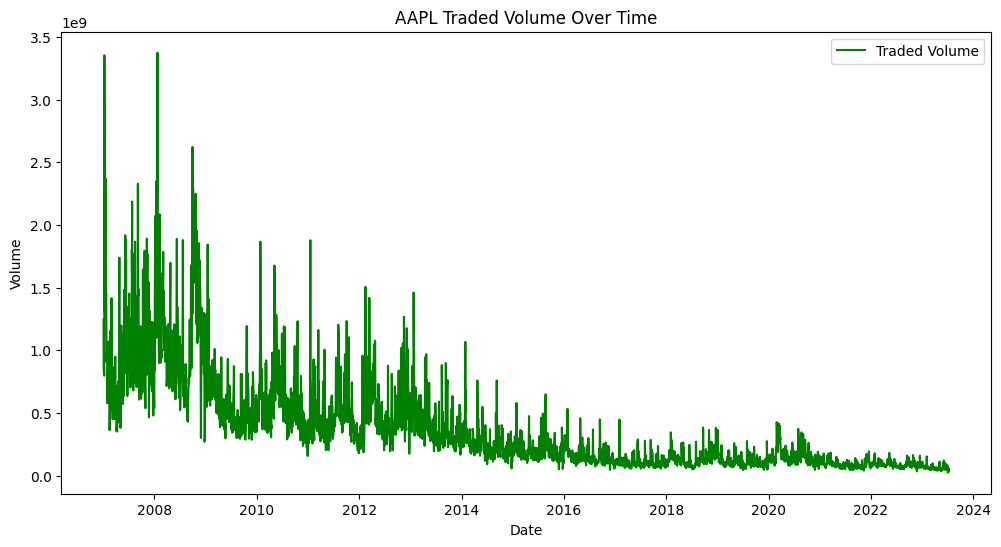

In [6]:

# Plotting traded volume over time
plt.figure(figsize=(12, 6))
plt.plot(data_AAPL['volume'], label='Traded Volume', color='green')
plt.title('AAPL Traded Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

At the same time, it can be observed that the transaction volume decreases significantly over time.In addition, the transaction volume records a strong amplitude of variation from 2008 to 2014, to then experience rather weak variations.

In [7]:
!pip install mplfinance


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.9 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


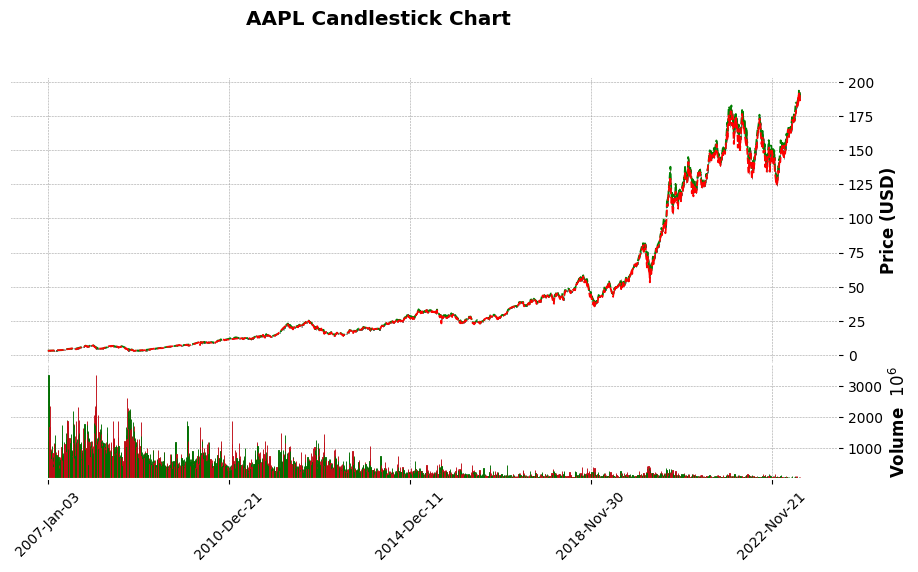

In [8]:
import pandas as pd
import mplfinance as mpf


candlestick_data = data_AAPL[['open','close','high', 'low', 'volume']]

# Draw the candlestick chart


candlestick_data.index = pd.to_datetime(candlestick_data.index)

ap_high = mpf.make_addplot(candlestick_data['high'], linestyle='dashed', color='green')
ap_low = mpf.make_addplot(candlestick_data['low'], linestyle='dashed', color='red')
# ap_high and ap_low will be add to mpf.plot  highlight the evolution of low prices and high prices marked in red and green

# Draw the candlestick chart with curve  high et low
mpf.plot(candlestick_data, type='candle', style='charles',
         title="AAPL Candlestick Chart",
         ylabel="Price (USD)", volume=True, figratio=(12,6),
         addplot=[ap_high, ap_low])

The candlestick chart above puts into perspective the evolution of high and low prices with in parallel the evolution of the transaction volume over the years. As we can see, the curves of the 2 types of prices are almost merged, recording an increase from 2007 until around 2018, to then experience a more significant increase after 2018. In parallel with the evolution of prices, we record a decrease in the volume of transactions when prices increase.

In [9]:
# Statistical Analysis
statistics = {}
for column in data_AAPL.select_dtypes(include='number').columns:
    mean = data_AAPL[column].mean()
    median = data_AAPL[column].median()
    std = data_AAPL[column].std()

    # Storage of results in dictionnary
    statistics[column] = {'mean': mean, 'median': median, 'std': std}

for column, stats in statistics.items():
    print(f"Statistics for {column}:")
    print(f"  Mean: {stats['mean']:.2f}")
    print(f"  Median: {stats['median']:.2f}")
    print(f"  Std: {stats['std']:.2f}")

Statistics for volume:
  Mean: 366292450.05
  Median: 213646276.00
  Std: 372479281.05
Statistics for vwap:
  Mean: 46.39
  Median: 25.89
  Std: 50.28
Statistics for open:
  Mean: 46.36
  Median: 25.77
  Std: 50.24
Statistics for close:
  Mean: 46.40
  Median: 25.82
  Std: 50.29
Statistics for high:
  Mean: 46.88
  Median: 26.26
  Std: 50.84
Statistics for low:
  Mean: 45.87
  Median: 25.68
  Std: 49.68
Statistics for time:
  Mean: 1428315199.81
  Median: 1428465600.00
  Std: 150527881.09
Statistics for transactions:
  Mean: 270931.77
  Median: 178246.00
  Std: 251085.85


If we look at the statistical analyses for the variable volume, high and low, we can see that for these 3 variables, the standard deviation is higher than the mean and the medians are lower than the mean. This means a very large dispersion of the data and a right-skewed distribution with high extreme values.


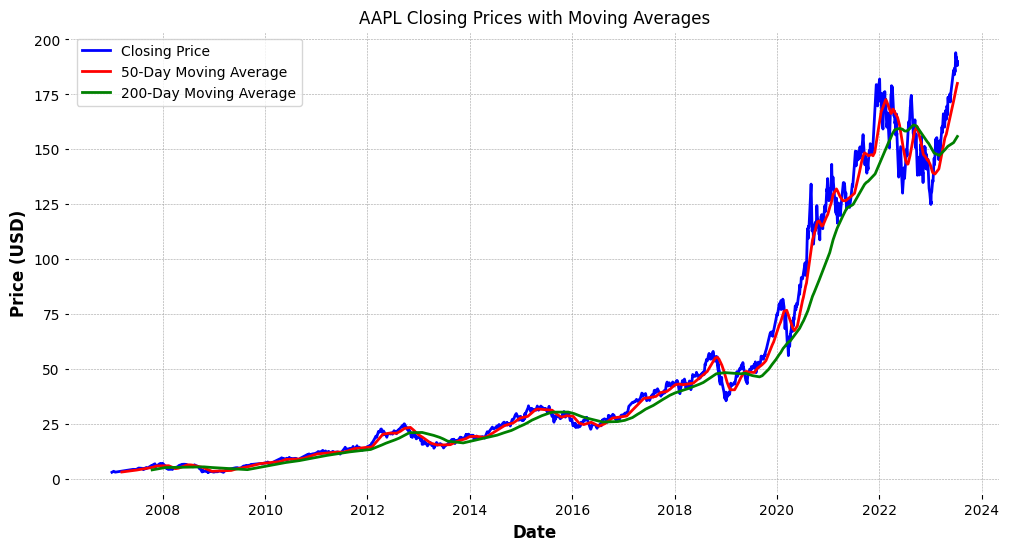

In [10]:
import matplotlib.pyplot as plt

# Computation of moving average of closing prices

# Calculate moving average (50-day and 200-day)
data_AAPL['MA50'] = data_AAPL['close'].rolling(window=50).mean()
data_AAPL['MA200'] = data_AAPL['close'].rolling(window=200).mean()

# Plot the closing prices and moving averages
plt.figure(figsize=(12, 6))
plt.plot(data_AAPL['close'], label='Closing Price', color='blue')
plt.plot(data_AAPL['MA50'], label='50-Day Moving Average', color='red')
plt.plot(data_AAPL['MA200'], label='200-Day Moving Average', color='green')
plt.title('AAPL Closing Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

A moving average of the closing prices was applied over 50 and 200 days. The graph above shows three curves representing the evolution of closing prices over time as well as the average evolution of closing prices. We can see that by applying a moving average over a longer interval (200 vs 50), we have a smoother curve, with less amplitude compared to the red curve which remains quite similar to the blue curve and also presents some amplitudes.

In [12]:
# Hypothesis testing

import scipy.stats as stats

# Filter data for two specific year (exemple : 2020 et 2021)
data_AAPL['datetime'] = pd.to_datetime(data_AAPL['time'], unit='s')

print(data_AAPL.columns)

data_2016 = data_AAPL[data_AAPL['datetime'].dt.year == 2016]['close']
data_2021 = data_AAPL[data_AAPL['datetime'].dt.year == 2021]['close']

# Perform a student test (t-test indépendant)
t_stat, p_value = stats.ttest_ind(data_2016, data_2021, equal_var=False)

# Print result
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference between the closing prices of the two years.")
else:
    print("There isn't a significant difference between the closing prices of the two years.")

Index(['volume', 'vwap', 'open', 'close', 'high', 'low', 'time',
       'transactions', 'MA50', 'MA200', 'datetime'],
      dtype='object')
T-statistic: -123.3129, P-value: 0.0000
There is a significant difference between the closing prices of the two years.


In [14]:
import scipy.stats as stats

# Computation of daily yields
data_AAPL['daily_return'] = data_AAPL['close'].pct_change() # calculates the percentage change between a value and the previous one in a Series or DataFrame

# Delete of NaN values
data_AAPL = data_AAPL.dropna()

# Normality test (Shapiro-Wilk)
shapiro_test = stats.shapiro(data_AAPL['daily_return'])

print(f" Shapiro-Wilk Statistic: {shapiro_test.statistic:.4f}, P-value: {shapiro_test.pvalue:.4f}")

# Interpretation
if shapiro_test.pvalue < 0.05:
    print("Daily returns do not follow a normal distribution.")
else:
    print("Daily returns  follow a normal distribution.")

 Shapiro-Wilk Statistic: 0.9374, P-value: 0.0000
Daily returns do not follow a normal distribution.


<ipython-input-14-cb7d0ee89b13>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_AAPL['daily_return'] = data_AAPL['close'].pct_change() # calculates the percentage change between a value and the previous one in a Series or DataFrame


Daily returns do not follow a normal distribution, meaning that the dispersion of  daily returns is heterogeneous over the years.


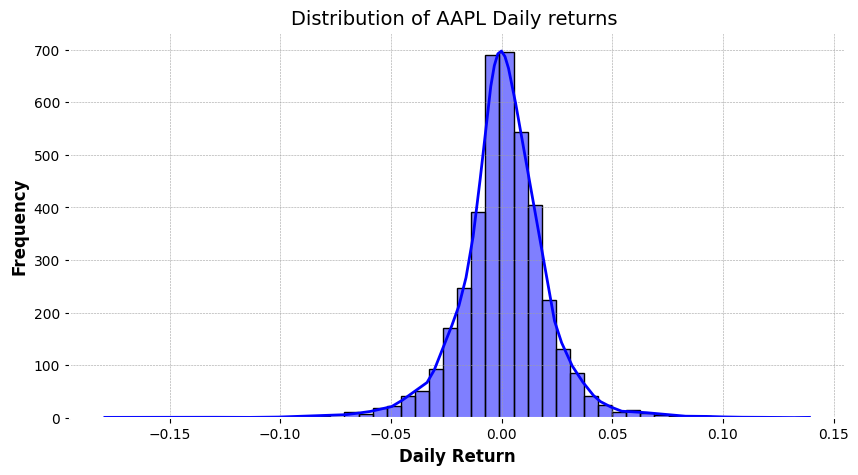

In [15]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.histplot(data_AAPL['daily_return'], bins=50, kde=True, color='blue')

# Add titles and labels
plt.title("Distribution of AAPL Daily returns ", fontsize=14)
plt.xlabel("Daily Return", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Print graphic
plt.show()




In [16]:
# Advances statistical techniques
import numpy as np

 # Calculation of 20-day moving average for closing price and volume

data_AAPL["MA_Close"] = np.convolve(data_AAPL["close"], np.ones(20)/20, mode="same")
data_AAPL["MA_Volume"] = np.convolve(data_AAPL["volume"], np.ones(20)/20, mode="same")

# Calculating the correlation between moving averages

correlation = np.corrcoef(data_AAPL["MA_Close"].dropna(), data_AAPL["MA_Volume"].dropna())[0,1]

print(f"Correlation between moving average closing prices and volume : {correlation:.4f}")

Correlation between moving average closing prices and volume : -0.5625


We have a fairly significant negative correlation which translates as follows:
An increase in the closing price leads to a decrease in the transaction volume.

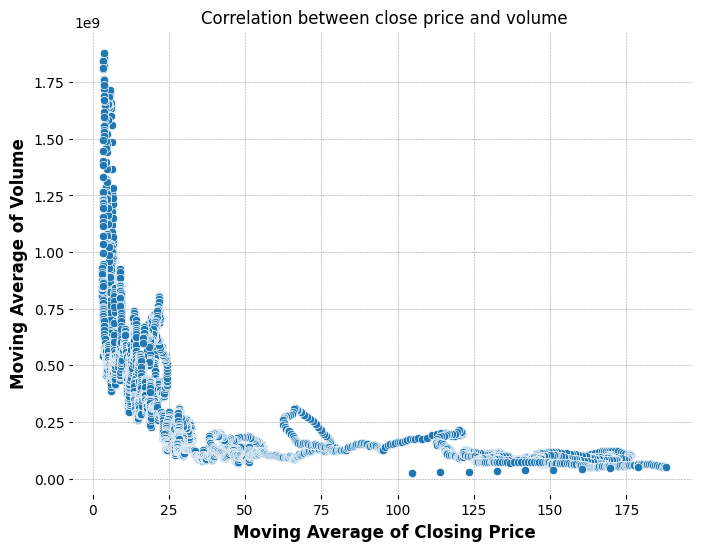

In [17]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=data_AAPL["MA_Close"], y=data_AAPL["MA_Volume"])
plt.xlabel("Moving Average of Closing Price")
plt.ylabel("Moving Average of Volume")
plt.title("Correlation between close price and volume")
plt.show()

6. Summary and Insights:
First, we performed an exploratory data analysis to obtain information on the number and nature of variables, the number of lines, the number of missing values, conversion of time to date, transaction frequency, etc.

Subsequently, we highlighted using visual support the evolution of certain variables over time such as the evolution of prices and volumes and the relationship between certain variables such as the different types of prices with the transaction volume over the years.

A statistical analysis such as the calculation of the mean, median and standard deviation was applied for each variable with certain variables that had a fairly heterogeneous distribution.

Subsequently, a moving average over different intervals was applied to the closing price and a graph was produced to show the differences in moving averages over the years.

Different types of tests were performed such as the student test and the fisher test to account for differences between two years concerning the closing prices, as well as to assess the normality of certain variables such as Daily return.

Finally, a correlation test was performed to judge whether there was a significant relationship between the transaction volume and the closing price.

These different studies have shown several things:

-The significant evolution of prices over the years
-The constant decrease in transaction volume over the years
-The decreasing relationship between transaction volume and closing price
-The fairly heterogeneous distribution of certain variables

7. Reflection:

At the beginning of the analysis, I had some difficulty knowing what to do with the 'time' variable, should I convert this data or leave it as is and since I could not find the Date variable then it seemed logical to me to do this conversion. I also had some difficulties creating the chart regarding the candle chart type, I had never done it before then I learned about the process and it worked.